Random Forest Model

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pymongo
import requests

In [2]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [3]:
results = client.census_DB.census.find()
cluster_data = []
for result in results:
    del result['_id']
    cluster_data.append(result)

In [4]:
cleaned_census_data = pd.DataFrame(cluster_data)
cleaned_census_data

,year,state,state_po,county_name,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Winner
0,2012,MISSOURI,MO,LINN,12668.0,43.0,39028.0,20968.0,13.245974,Republican
1,2012,MISSOURI,MO,HOWELL,40330.0,39.6,34148.0,17763.0,20.300025,Republican
2,2012,MISSOURI,MO,JOHNSON,52964.0,29.7,47960.0,21375.0,15.246205,Republican
3,2012,MISSOURI,MO,LACLEDE,35507.0,39.1,39101.0,19788.0,18.244290,Republican
4,2012,MISSOURI,MO,MARIES,9140.0,43.1,44885.0,21883.0,14.070022,Republican
...,...,...,...,...,...,...,...,...,...,...
9002,2020,MINNESOTA,MN,RENVILLE,14572.0,44.0,58542.0,31243.0,9.422180,Republican
9003,2020,MINNESOTA,MN,ROSEAU,15259.0,41.6,62304.0,31452.0,7.425126,Republican
9004,2020,MINNESOTA,MN,SHERBURNE,96015.0,36.1,88671.0,36022.0,5.158569,Republican
9005,2020,MINNESOTA,MN,STEELE,36710.0,39.2,68172.0,34648.0,7.864342,Republican


In [5]:
#df = pd.read_csv('clean_data.csv')

In [6]:
cleaned_census_data.dtypes

year                   int64
state                 object
state_po              object
county_name           object
Population           float64
Median Age           float64
Household Income     float64
Per Capita Income    float64
Poverty Rate         float64
Winner                object
dtype: object

In [7]:
# for col in df.columns:
#     if df[col].dtype == 'object':
#         df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
#drop non feature columns that are objects
cleaned_census_data = cleaned_census_data.drop(columns=['state', 'county_name','state_po'])

In [9]:
#pd.get_dummies(X['state_po'])

In [10]:
cleaned_census_data.dtypes

year                   int64
Population           float64
Median Age           float64
Household Income     float64
Per Capita Income    float64
Poverty Rate         float64
Winner                object
dtype: object

In [11]:
#df.dropna(inplace=True)
        
X = cleaned_census_data.drop('Winner', axis=1)
y = cleaned_census_data['Winner']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#np.seterr(divide='ignore', invalid='ignore')

In [14]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.855715871254162


[0.02810507 0.29913808 0.150774   0.15634069 0.18382481 0.18181734]


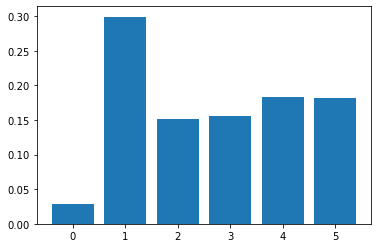

In [15]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

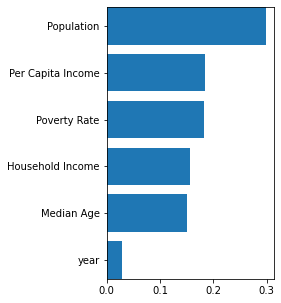

In [16]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(3,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()